In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Hour 2: Practical k-Means with the Wine Dataset 🍷

## 1. Load the Wine Dataset

We will load the Wine dataset using scikit-learn. This dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [6]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset
wine = load_wine()
wine_data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_target = pd.Series(wine.target)

print("Wine Dataset Shape:", wine_data.shape)
print("\nFirst 5 rows of the dataset:")
print(wine_data.head())
print("\nTarget Variable Distribution:")
print(wine_target.value_counts())

Wine Dataset Shape: (178, 13)

First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

  

## 2. Explore and Preprocess the Data

We will explore the dataset's features and target variable. Then, we will check for missing values and scale the features using `StandardScaler`.

In [7]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print("\nMissing values per column:")
print(wine_data.isnull().sum())

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data)
scaled_wine_data = pd.DataFrame(scaled_data, columns=wine_data.columns)

print("\nScaled data shape:")
print(scaled_wine_data.shape)
print("\nFirst 5 rows of scaled data:")
print(scaled_wine_data.head())


Missing values per column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Scaled data shape:
(178, 13)

First 5 rows of scaled data:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  pr

## 3. Apply k-Means Clustering

We will apply the k-Means algorithm to the scaled data.

In [8]:
from sklearn.cluster import KMeans

# Apply k-Means
kmeans = KMeans(n_clusters=3, random_state=42) #initial assumption: 3 clusters
kmeans.fit(scaled_wine_data)
labels = kmeans.labels_

print("\nCluster labels:")
print(labels)


Cluster labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 4. Determine the Optimal Number of Clusters (k)

We will use the elbow method and silhouette score to find the best 'k'.

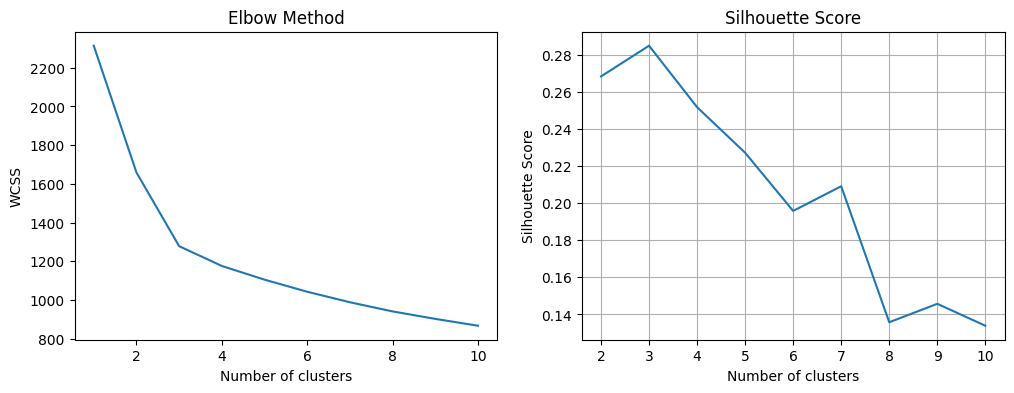

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

fig, axes = plt.subplots(1,2, figsize = (12,4))

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_wine_data)
    wcss.append(kmeans.inertia_)

axes[0].plot(range(1, 11), wcss)
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('WCSS')

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_wine_data)
    silhouette_avg = silhouette_score(scaled_wine_data, labels)
    silhouette_scores.append(silhouette_avg)

axes[1].plot(range(2, 11), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')

plt.grid(True)
plt.show()

## 5. Analyze the Clusters

We will analyze the characteristics of the clusters by examining the mean values of each feature within each cluster.

In [40]:
# Analyze cluster characteristics
wine_data['Cluster'] = labels
cluster_means = wine_data.groupby('Cluster').mean()
print("\nCluster Means:")
print(cluster_means)




Cluster Means:
           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.608462    1.556154  2.035385          16.830769   97.384615   
1        14.105000    1.763000  2.405000          15.710000  106.400000   
2        12.512000    4.150000  2.291000          20.740000   94.000000   
3        13.016400    3.783200  2.401600          21.080000   95.760000   
4        12.273929    1.647857  2.183214          19.403571   90.035714   
5        12.362000    1.498000  2.248000          20.420000  144.400000   
6        12.090000    1.675556  2.428889          22.483333   86.777778   
7        13.347727    3.032273  2.485909          22.181818  102.318182   
8        13.507600    1.946000  2.666400          19.308000  108.680000   
9        13.826364    1.944545  2.288182          15.409091  105.318182   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluste

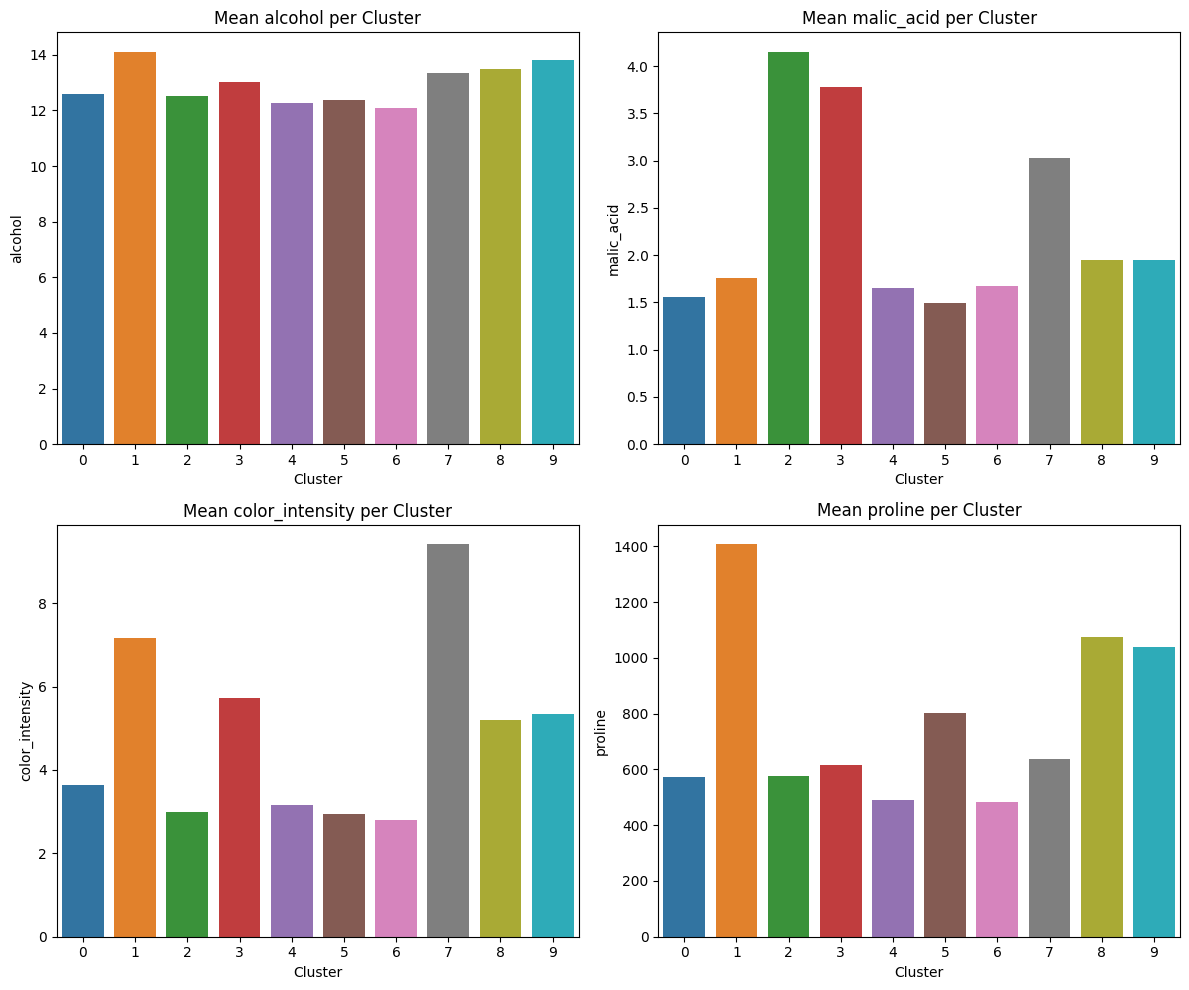

In [41]:
# Visualization of cluster means for selected features
selected_features = ['alcohol', 'malic_acid', 'color_intensity', 'proline']

# Selected features for visualization
selected_features = ['alcohol', 'malic_acid', 'color_intensity', 'proline']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through features and plot in each subplot
for idx, feature in enumerate(selected_features):
    sns.barplot(x=cluster_means.index, y=cluster_means[feature], ax=axes[idx])
    axes[idx].set_title(f'Mean {feature} per Cluster')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(feature)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

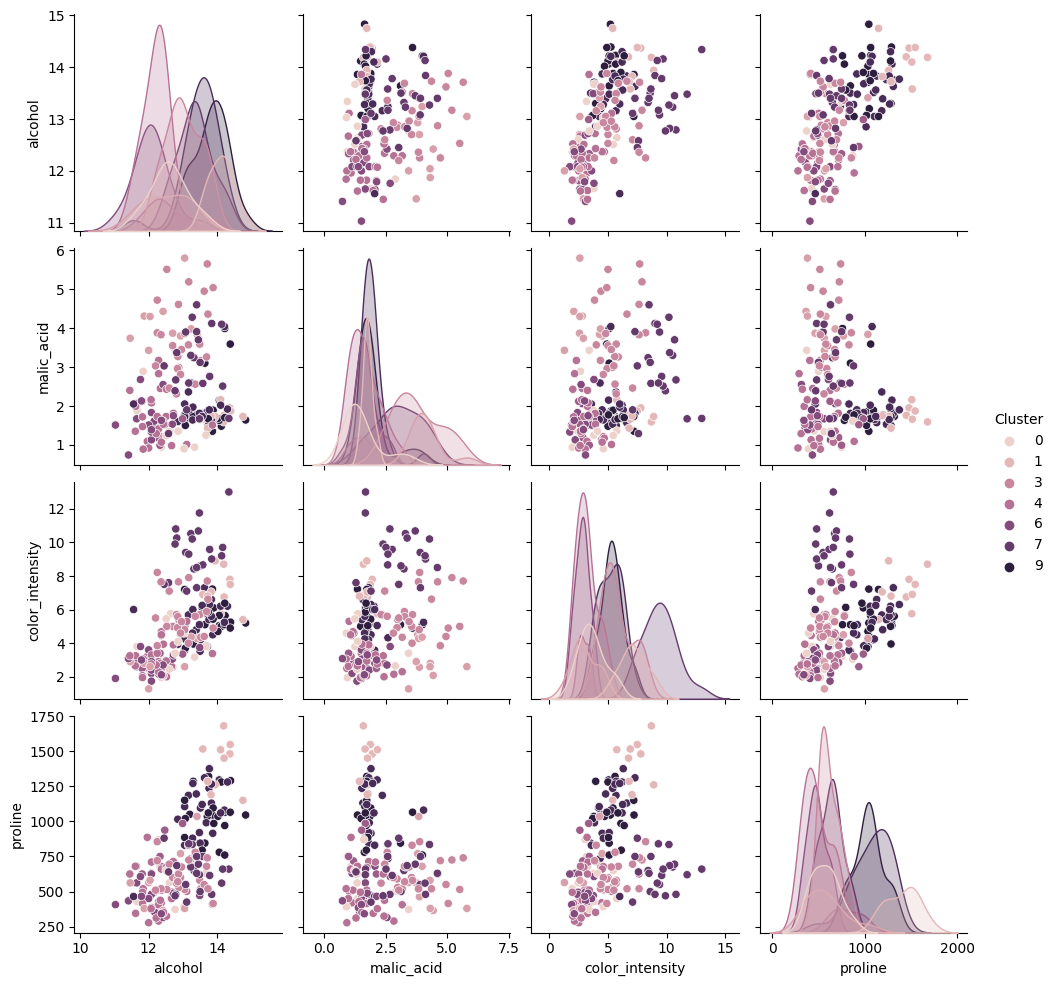

In [39]:
# Pair plot of selected features with cluster labels
sns.pairplot(wine_data, vars=selected_features, hue='Cluster')
plt.show()

## 6. Interpret the Results and Draw Conclusions

We will interpret the clustering results in the context of the wine dataset and draw conclusions about the different groups of wine samples based on the feature means.

**Step 1: Examine the Cluster Means**

Let's look at each feature and compare the mean values across the three clusters:

* **alcohol:** Cluster 0: 13.74, Cluster 1: 12.26, Cluster 2: 13.15
* **malic_acid:** Cluster 0: 2.01, Cluster 1: 1.94, Cluster 2: 3.33
* **ash:** Cluster 0: 2.46, Cluster 1: 2.24, Cluster 2: 2.44
* **alcalinity_of_ash:** Cluster 0: 17.03, Cluster 1: 20.24, Cluster 2: 21.10
* **magnesium:** Cluster 0: 106.33, Cluster 1: 92.77, Cluster 2: 98.81
* **total_phenols:** Cluster 0: 2.84, Cluster 1: 2.07, Cluster 2: 1.68
* **flavanoids:** Cluster 0: 2.98, Cluster 1: 1.84, Cluster 2: 0.80
* **nonflavanoid_phenols:** Cluster 0: 0.29, Cluster 1: 0.39, Cluster 2: 0.45
* **proanthocyanins:** Cluster 0: 1.90, Cluster 1: 1.63, Cluster 2: 1.15
* **color_intensity:** Cluster 0: 5.53, Cluster 1: 3.09, Cluster 2: 7.24
* **hue:** Cluster 0: 1.06, Cluster 1: 1.06, Cluster 2: 0.69
* **od280/od315_of_diluted_wines:** Cluster 0: 3.16, Cluster 1: 2.78, Cluster 2: 1.69
* **proline:** Cluster 0: 1072.25, Cluster 1: 519.84, Cluster 2: 627.50

**Step 2: Relate to Wine Characteristics**

* High alcohol and proline in Cluster 0 might indicate a specific type of wine.
* High malic acid and color intensity in Cluster 2 could suggest another distinct wine type.
* Lower flavanoids, and higher nonflavanoid phenols are observed in cluster 2. Flavanoids contribute to the taste and mouthfeel of wine.
* Color intensity and hue are important characteristics of red wines.

**Step 3: Draw Conclusions**

* **Cluster 0:** Wines in this cluster have higher alcohol and proline content, higher total phenols and flavanoids, and lower alcalinity of ash.
* **Cluster 1:** Wines in this cluster have lower alcohol, magnesium, total phenols, flavanoids, and proline content, but higher alcalinity of ash.
* **Cluster 2:** Wines in this cluster have higher malic acid and color intensity, and lower hue, total phenols, flavanoids.

These clusters likely represent different cultivars or wine-making processes.